<a href="https://colab.research.google.com/github/dannyxia7/UCSD_DSC_207R/blob/main/Danny_Xia_Week7_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 7 Study Notebook

# UC San Diego OMDS DSC 207

### Importing Libraries

We will start by importing any relevant Python libraries. The code block below should be the place where you import all regular Python libraries (such as pandas, numpy, matplotlib, etc.)

In [ ]:
# Load libraries as relevant for this assignment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Part 1: Regression (Consumer Goods Data and Investments Data)

We will perform linear regression to use our financial data to predict projected investments.

### 1.1 Datasets
We'll be using the a merged [dataset](https://drive.google.com/file/d/17tyrmrUQYaiia3zY6YgQy8LIUuM37hrd/view?usp=sharing) consisting of consumer_goods and investments and try to predict the Percentage Investment using Linear Regression. The dataset can be found here. Load this dataset into a dataframe `goods_investments` and have a look at it using head, info and describe methods. [0.5 pt]<br>
<br><br>

In [ ]:
goods_investments = pd.read_csv("/content/goods_investments.csv")

### 1.2 Train and test split [1 pt]
1. Shuffle your data (optional)
2. Partition it into an 80%/20% train/test split using train_test_split.<br>

Note: The store number column would not likely contribute towards a prediction. Hence, it would be better to drop the column before splitting.

X_train and X_test should have these columns: `Convenience`, `Shopping`, `Specialty`, `Unsought`, `Other`<br>
y_train and y_test should have this column: `Percentage Investment`<br>
<br><br>

In [ ]:
goods_investments.head(10)

,Store Number,Convenience,Shopping,Specialty,Unsought,Other,Percentage Investment
0,1101,301121,42712,169038,89371,296474,18.8
1,1101,9473,326,5276,3871,8943,18.8
2,1103,99476,9576,45791,44109,109323,15.8
3,1103,78919,6537,41600,30782,81220,15.8
4,1103,30401,1588,17791,11022,29601,15.8
5,1105,16271,3616,10175,2480,15450,35.0
6,1107,26826,3541,17386,5899,27921,25.8
7,1109,23840,3437,13858,6545,23530,25.1
8,1109,20582,2097,10239,8246,19199,25.1
9,1111,21531,2475,13280,5776,23702,21.8


In [ ]:
X_data = goods_investments.drop("Store Number", axis=1)
y_target = goods_investments["Percentage Investment"]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.2)

#### 1.3 Print out the shapes of X_train, X_test, y_train, y_test [0.5 pt]

In [ ]:
# Your code here
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (3708, 6)
X_test shape:  (928, 6)
y_train shape:  (3708,)
y_test shape:  (928,)


#### 1.4 Fit a regressor

Create a <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">linear regression model</a> and fit it to your training dataset. [0.5 pt]<br>


In [ ]:
investment_regression = LinearRegression().fit(X_train, y_train)

#### 1.5 Use your model to predict on your test set. [0.5 pt]


In [ ]:

investment_predictions = investment_regression.predict(X_test)


#### 1.6 Report the RMSE of the prediction. (The [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) library is useful. Note - We want to find the root of MSE). [0.5 pt]

In [ ]:
rmse = mean_squared_error(investment_predictions, y_test)
print(rmse)

1.0669214900579199e-23


<!-- BEGIN QUESTION -->

#### 1.7 Print the intercept value of the linear regression, along with the coefficients of each of the input features. [1 pt]

In [ ]:
# Your code here
investment_regression.intercept_

4.2454928461665986e-13

# Part 2: Classification

### **Instructions**

Out of the three classifiers taught this week (decision trees, logistic regression, Naive Bayes), you must implement two of them.

You will follow the steps for each classifier model that you implement:
- Defining the model.
- Fit the classifier defined in step 4 on the training data (X_train, y_train).
- Generate a list predictions_train containing all the grade predictions for the train set.
- Generate a list predictions_test containing all the grade predictions for the test set.
- Calculate the accuracy of your model on the train and test sets.

### The Dataset

For your classification tasks, you will work on weather data. The goal is to classify the weather being high_humidity or not based on other weather conditions.

Here is a pre-processed version of the [dataset](https://drive.google.com/file/d/11mKR0uGIk8ZCG2jmk0m_GxiYPLq6rAfc/view?usp=share_link)


### Load Data

Load the dataset into a dataframe `df`. The url to retrieve the data from can be found here: https://raw.githubusercontent.com/dsc207rfall2023/fa23course-dsc207r/main/assignments/Week%207/input_data/humidity.csv. Read this data into a pandas dataframe `df`

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/dsc207rfall2023/fa23course-dsc207r/main/assignments/Week%207/input_data/humidity.csv")

<!-- END QUESTION -->

### Importing Machine Learning Libraries

You will need to import machine learning libraries of your choice for performing different tasks in this assignment. Update this cell with each import and re-run it to update your notebook.

In [ ]:
# Import relevant machine learning libraries in this cell as relevant for this assignment
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<!-- BEGIN QUESTION -->

### 2.1 Understanding the Data

##### Get information about the various columns of the dataframe using head, describe and info methods of dataframes. [1 pt]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   air_pressure_9am        1064 non-null   float64
 1   air_temp_9am            1064 non-null   float64
 2   avg_wind_direction_9am  1064 non-null   float64
 3   avg_wind_speed_9am      1064 non-null   float64
 4   max_wind_direction_9am  1064 non-null   float64
 5   max_wind_speed_9am      1064 non-null   float64
 6   rain_accumulation_9am   1064 non-null   float64
 7   rain_duration_9am       1064 non-null   float64
 8   high_humidity_label     1064 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 74.9 KB


In [ ]:
# Your code here
df.head(10)

0.49718045112781956

<!-- BEGIN QUESTION -->

### 2.2 Generate a [histogram graph for counts for all values](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html).
Set the figsize parameter to a suitable size for readability. You need not plot each histogram individually. Instead use the provided reference to plot the distributions together like the sample below. [0.5 pt]

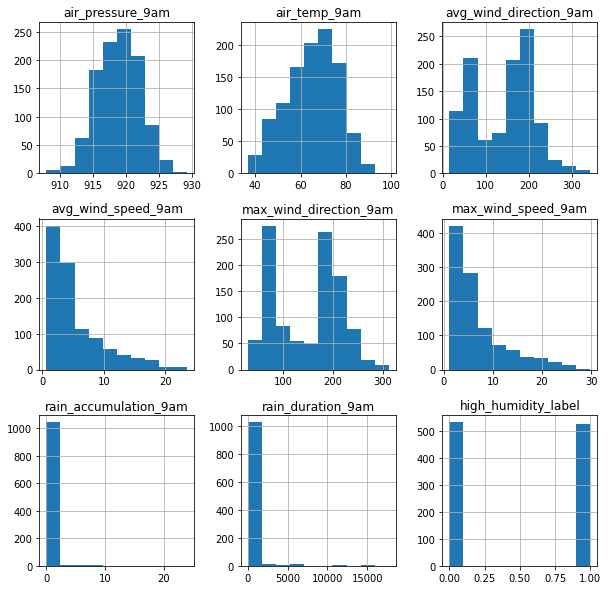

array([[<Axes: title={'center': 'air_pressure_9am'}>,
        <Axes: title={'center': 'air_temp_9am'}>,
        <Axes: title={'center': 'avg_wind_direction_9am'}>],
       [<Axes: title={'center': 'avg_wind_speed_9am'}>,
        <Axes: title={'center': 'max_wind_direction_9am'}>,
        <Axes: title={'center': 'max_wind_speed_9am'}>],
       [<Axes: title={'center': 'rain_accumulation_9am'}>,
        <Axes: title={'center': 'rain_duration_9am'}>,
        <Axes: title={'center': 'high_humidity_label'}>]], dtype=object)

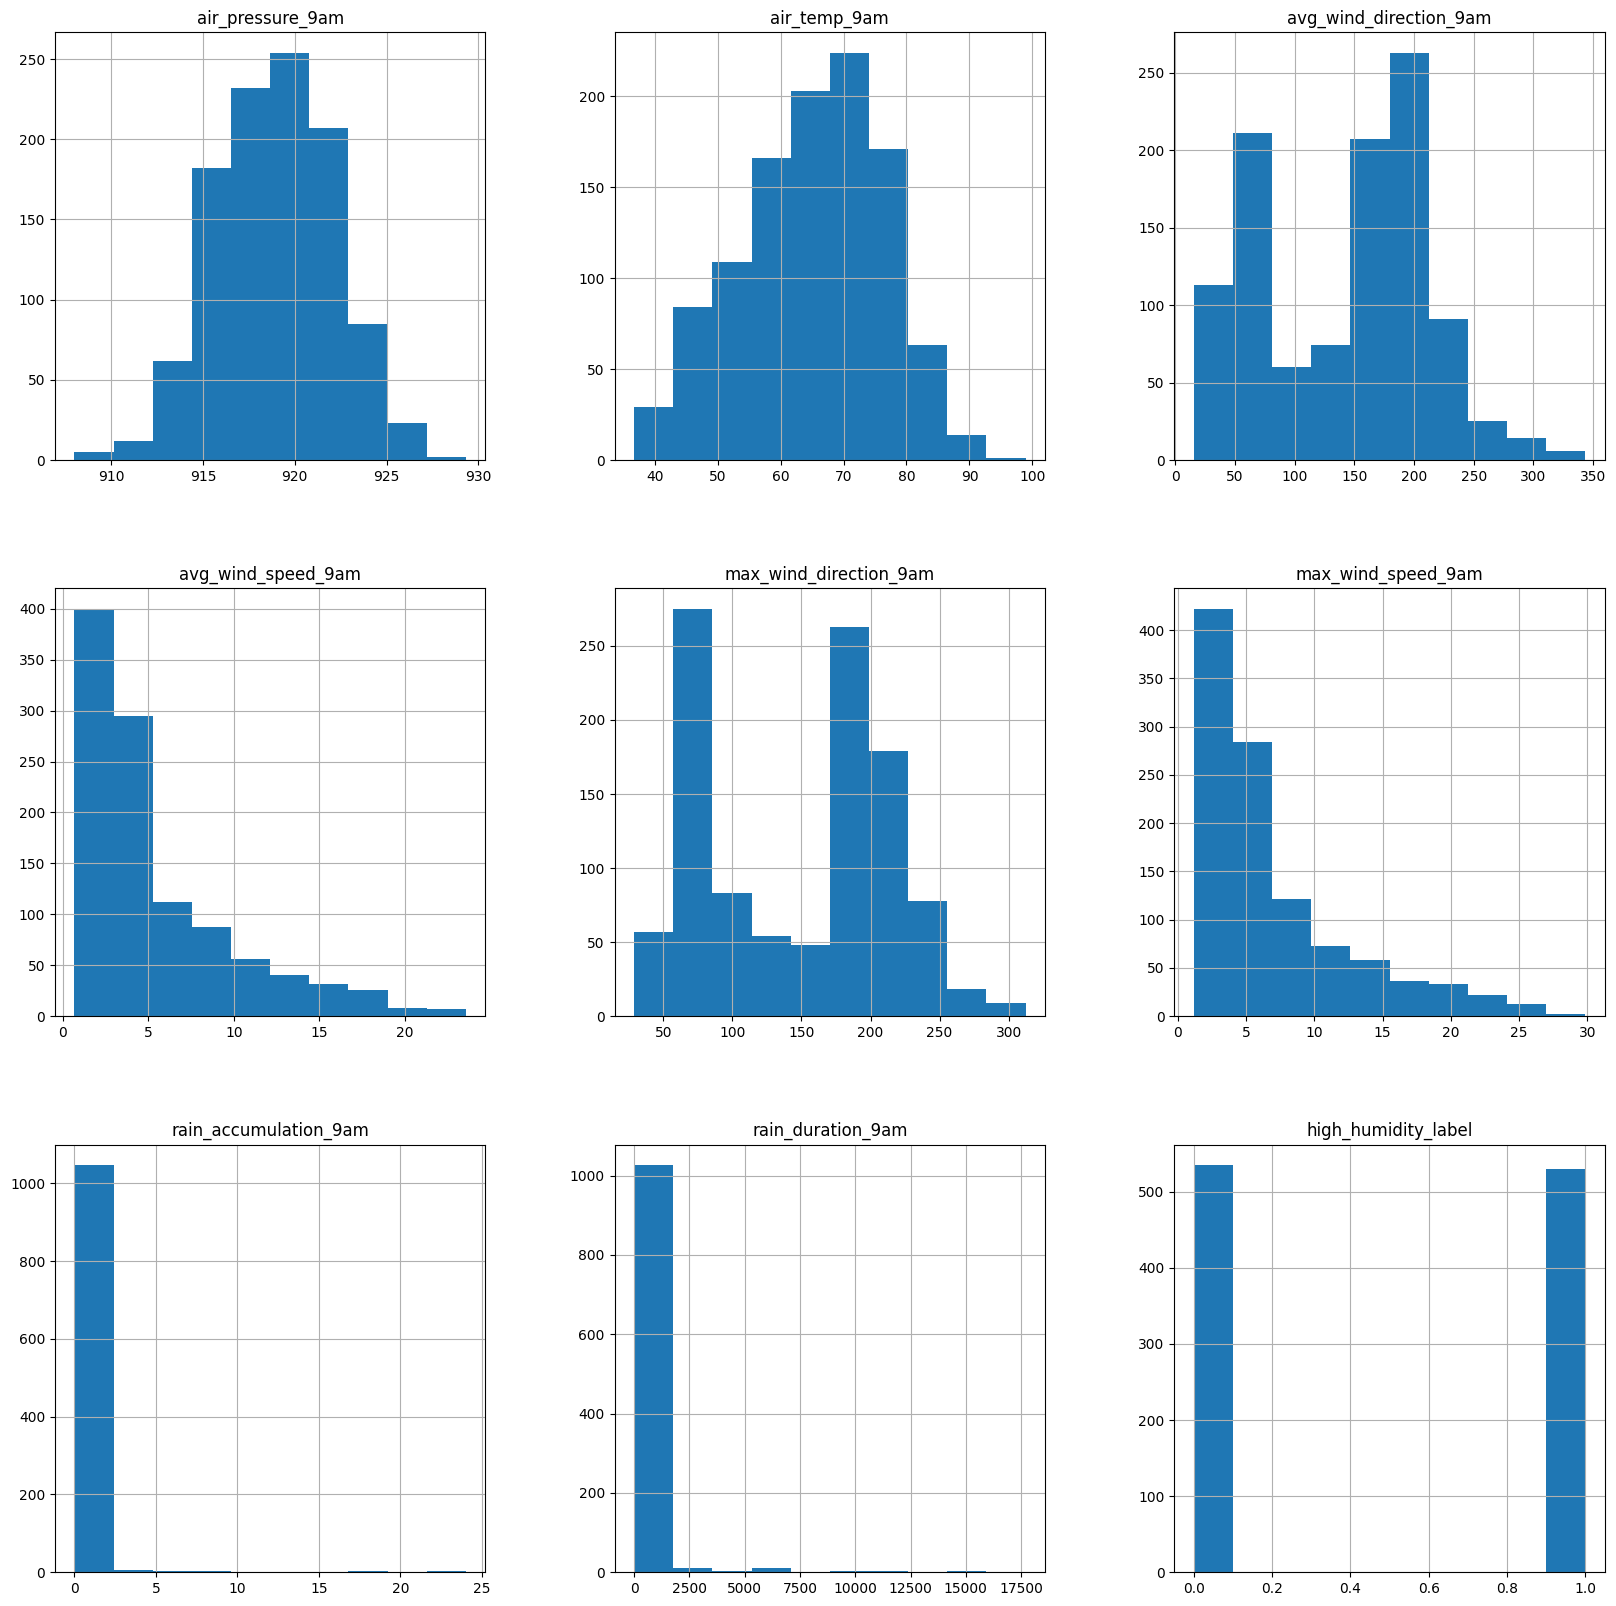

In [ ]:
df.hist(figsize=(20, 20))

<!-- END QUESTION -->

### 2.3 Preparing the input fields and target variable [0.5 pt]

1. We want to create a dataframe of features `X` without the labels.
2. We want to remove the target variable `label` and store it another dataframe `y`.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1064 entries, 0 to 1063
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   air_pressure_9am        1064 non-null   float64
 1   air_temp_9am            1064 non-null   float64
 2   avg_wind_direction_9am  1064 non-null   float64
 3   avg_wind_speed_9am      1064 non-null   float64
 4   max_wind_direction_9am  1064 non-null   float64
 5   max_wind_speed_9am      1064 non-null   float64
 6   rain_accumulation_9am   1064 non-null   float64
 7   rain_duration_9am       1064 non-null   float64
 8   high_humidity_label     1064 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 74.9 KB


In [ ]:
X = df.drop("high_humidity_label",axis=1)
y = df["high_humidity_label"]

### 2.4 Preparing train and test sets [0.5 pt]

Split data into training(80%) and test(20%) set using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with some value of random_state.

After this step, you should have 4 dataframes - `X_train, X_test, y_train, y_test`.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

##2.5 Classifier #1

### 2.5.1 Defining the first classifier model [0.5 pt]

Choose either a decision tree, logistic regression, or Naive Bayes model.
Import and create a classifier model called `clf_1`.

In [ ]:
clf_1 = DecisionTreeClassifier()

### 2.5.2 Fit the classifier defined in step 4  on the training data (X_train, y_train) [0.5 pt]

In [ ]:
clf_1.fit(X_train, y_train)

DecisionTreeClassifier()

### 2.5.3 Generate predictions for train

Generate a list `predictions_train` containing all the grade predictions for the train set [0.5 pt]

In [ ]:
predictions_train1 = clf_1.predict(X_train)

### 2.5.4 Generate predictions for train

Generate a list `predictions_test` containing all the grade predictions for the test set [0.5 pt]

In [ ]:
predictions_test1 = clf_1.predict(X_test)

<!-- BEGIN QUESTION -->

### 2.5.5 Calculate accuracy

Find the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) of **train** set for your model using above predictions. (Make sure you have imported the library) [0.5 pt]

In [ ]:
acc_train = accuracy_score(y_train, predictions_train1)
print(acc_train)

1.0


<!-- END QUESTION -->

Find the accuracy of test set for your model using above predictions. [0.5 pt]

In [ ]:
acc_test = accuracy_score(y_test, predictions_test1)
print(acc_test)

0.812206572769953


<!-- BEGIN QUESTION -->

Which accuracy (test or train) is higher? Why? [0.5 pt]

In [ ]:
# Write your reasoning in words here
# The train accuracy is higher because the model can perfectly fit the data given that it has the true labels.

The train accuracy is higher because the model can perfectly fit the data given that it has the true labels.

## 2.6 Classifier #2

### 2.6.1 Defining the second classifier model [0.5 pt]

Choose either a decision tree, logistic regression, or Naive Bayes model. This must be a different model from your first classifier! Import and create a classifier model called `clf_12`.

In [ ]:
clf_2 = BernoulliNB()

### 2.6.2 Fit the classifier defined in step 4  on the training data (X_train, y_train) [0.5 pt]

In [ ]:
clf_2.fit(X_train, y_train)

BernoulliNB()

### 2.6.3 Generate predictions for train

Generate a list `predictions_train` containing all the grade predictions for the train set [0.5 pt]

In [ ]:
predictions_train2 = clf_2.predict(X_train)

### 2.6.4 Generate predictions for train

Generate a list `predictions_test` containing all the grade predictions for the test set [0.5 pt]

In [ ]:
predictions_test2 = clf_2.predict(X_test)

<!-- BEGIN QUESTION -->

### 2.6.5 Calculate accuracy

Find the [accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) of **train** set for your model using above predictions. (Make sure you have imported the library) [0.5 pt]

In [ ]:
NB_acc_train = accuracy_score(y_train, predictions_train2)
print(NB_acc_train)

0.535840188014101


<!-- END QUESTION -->

Find the accuracy of test set for your model using above predictions. [0.5 pt]

In [ ]:
NB_acc_test = accuracy_score(y_test, predictions_test2)
print(NB_acc_test)

0.5305164319248826


In [ ]:
print("proportion of data with high_humidity_label=1:", df['high_humidity_label'].sum() / len(df))

proportion of data with high_humidity_label=1: 0.49718045112781956


<!-- BEGIN QUESTION -->

Which accuracy (test or train) is higher? Why? [0.5 pt]

In [ ]:
# Write your reasoning in words here
# For this naive bayes model, after having run it several times,
# the train accuracy and test accuracy actually alternate being higher or lower
# between runs. This may indicate that the data is noisy, that the algorithm
# doesn't work well for this dataset, or there is some degree of overfitting
# or underfitting occurring.

## 2.7: Video

Create a video with the following components:
* Explain why you chose the two classifier models you chose in part 2. [1 pt]
* Explain the steps you took to code each model briefly (creating the model, fitting the classifier to the data, generating predictions, calculating accuracy). Also explain how you generated train/test sets. [2 pts]
* Compare the results of both the models based on your generated accuracies. [1 pt]


Additionally (and this is important), ensure you follow the format the video submission. If one of these criteria is missing, we will not grade the video.
* Show some form of ID at the start of the video so we know who you are.
* Show your code in the video by screensharing.
* Show your face in the video.



LINK TO YOUR VIDEO HERE: https://drive.google.com/file/d/13gxe9JW829IJVjFSLXNW-WjqpNtvqyUJ/view?usp=sharing

# Submission

Before you submit your notebook, ensure that you've run all the cells sequentially to display images, graphs, and outputs correctly. Take the time to review your solutions and evaluate using the public test cases. Once you're satisfied, save your notebook by navigating to "File" in the Jupyter Notebook menu and selecting "Save" or using the keyboard shortcut (usually Ctrl + S or Cmd + S).

To submit, export your notebook as an .ipynb file. Ensure it's saved with the same name as the assignment. Then, upload this .ipynb file to Gradescope. Remember to submit the correct version.

Please save your work before exporting it, and if you encounter any technical issues or have questions about the submission process, reach out to the course staff for assistance